In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

alyangula au
mataura pf
constitucion mx
anchorage us
ushuaia ar
vaini to
alyangula au
taolanaro mg
walvis bay na
hobart au
kemi fi
talnakh ru
yellowknife ca
sentyabrskiy ru
ushuaia ar
maceio br
victoria sc
ushuaia ar
maraba br
georgetown sh
talnakh ru
chuy uy
cabo san lucas mx
punta arenas cl
new norfolk au
kodiak us
escarcega mx
at-bashi kg
zaozhuang cn
fortuna us
russell nz
belushya guba ru
mana gf
ampanihy mg
tucuma br
sinjah sd
kaitangata nz
meulaboh id
amderma ru
albany au
touros br
mataura pf
bathsheba bb
mtwara tz
rikitea pf
illoqqortoormiut gl
punta arenas cl
rikitea pf
taolanaro mg
ancud cl
isla mujeres mx
albany au
saint george bm
rikitea pf
pacific grove us
motozintla mx
naze jp
nevelsk ru
katsuura jp
hermanus za
rikitea pf
warqla dz
mendahara id
rikitea pf
correntina br
nome us
matara lk
saint-augustin ca
djibo bf
saint-philippe re
hereford us
egvekinot ru
bethel us
barrow us
punta arenas cl
haines junction ca
ribas do rio pardo br
punta arenas cl
taolanaro mg
cam pha vn
am

taolanaro mg
cockburn town bs
vaini to
illoqqortoormiut gl
floresti md
khuzdar pk
hirara jp
taolanaro mg
namibe ao
saint-philippe re
hermanus za
nanortalik gl
puerto ayora ec
dovolnoye ru
port alfred za
butaritari ki
punta arenas cl
albany au
vaini to
illoqqortoormiut gl
port hedland au
mahebourg mu
rikitea pf
coahuayana mx
matameye ne
port elizabeth za
arraial do cabo br
bredasdorp za
barrow us
ulladulla au
barentsburg sj
ribas do rio pardo br
albany au
illoqqortoormiut gl
abu samrah qa
ushuaia ar
busselton au
thompson ca
safaga eg
darhan mn
lam luk ka th
lebu cl
raudeberg no
chabahar ir
ninghai cn
ushuaia ar
taolanaro mg
coihaique cl
attawapiskat ca
karaul ru
puerto ayora ec
barabinsk ru
atuona pf
harwich us
lorengau pg
albany au
klaksvik fo
griffith au
vaini to
toliary mg
mutterstadt de
clyde river ca
bethel us
puerto ayora ec
rio grande br
lindi tz
nova olimpia br
narsaq gl
mataura pf
bandiagara ml
khatanga ru
vaini to
dzhusaly kz
khatanga ru
chokurdakh ru
nagato jp
rikitea pf
tooe

cape town za
morondava mg
ekibastuz kz
hirata jp
avera pf
barrow us
yellowknife ca
batesville us
anadyr ru
kodiak us
lebedyn ua
rehoboth na
vaini to
ushuaia ar
hilo us
grand river south east mu
khatanga ru
aswan eg
puerto ayora ec
pisco pe
stonewall ca
aykino ru
puerto ayora ec
lufilufi ws
port elizabeth za
rosamorada mx
busselton au
karauzyak uz
victoria sc
qaanaaq gl
siderno it
ondjiva ao
praia cv
arraial do cabo br
yinchuan cn
evensk ru
busselton au
klaksvik fo
mitsamiouli km
rio de janeiro br
vaini to
punta arenas cl
hobart au
port alfred za
albany au
atuona pf
husavik is
khatanga ru
jamestown sh
tasiilaq gl
otradnoye ru
mys shmidta ru
mount gambier au
new norfolk au
cabo san lucas mx
taolanaro mg
medicine hat ca
kahului us
vaini to
qaanaaq gl
ushuaia ar
gizo sb
saskylakh ru
lavrentiya ru
belushya guba ru
tebingtinggi id
cabo san lucas mx
ust-nera ru
phan thiet vn
rikitea pf
port augusta au
hermanus za
port alfred za
arraial do cabo br
urumqi cn
hithadhoo mv
king city us
flin flon 

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d8d4472b6ed03dfb6518955b4950f6b


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alyangula
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | anchorage
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | walvis bay
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | kemi
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 14 of Set 1 | maceio
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | maraba
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 

Processing Record 34 of Set 4 | svetlyy
Processing Record 35 of Set 4 | gunjur
Processing Record 36 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 4 | methoni
Processing Record 38 of Set 4 | samusu
City not found. Skipping...
Processing Record 39 of Set 4 | luwuk
Processing Record 40 of Set 4 | aberdeen
Processing Record 41 of Set 4 | karasburg
Processing Record 42 of Set 4 | sitia
Processing Record 43 of Set 4 | trofaiach
Processing Record 44 of Set 4 | verkhoyansk
Processing Record 45 of Set 4 | port hardy
Processing Record 46 of Set 4 | cidreira
Processing Record 47 of Set 4 | monrovia
Processing Record 48 of Set 4 | pinawa
Processing Record 49 of Set 4 | qaanaaq
Processing Record 50 of Set 4 | avarua
Processing Record 1 of Set 5 | mandan
Processing Record 2 of Set 5 | mahajanga
Processing Record 3 of Set 5 | ternate
Processing Record 4 of Set 5 | urumqi
Processing Record 5 of Set 5 | solnechnyy
Processing Record 6 of Set 5 | tuktoyaktuk
Processing Recor

Processing Record 26 of Set 8 | coahuayana
Processing Record 27 of Set 8 | matameye
City not found. Skipping...
Processing Record 28 of Set 8 | ulladulla
Processing Record 29 of Set 8 | abu samrah
Processing Record 30 of Set 8 | safaga
Processing Record 31 of Set 8 | darhan
Processing Record 32 of Set 8 | lam luk ka
Processing Record 33 of Set 8 | lebu
Processing Record 34 of Set 8 | raudeberg
Processing Record 35 of Set 8 | chabahar
Processing Record 36 of Set 8 | ninghai
Processing Record 37 of Set 8 | coihaique
Processing Record 38 of Set 8 | karaul
City not found. Skipping...
Processing Record 39 of Set 8 | barabinsk
Processing Record 40 of Set 8 | harwich
Processing Record 41 of Set 8 | griffith
Processing Record 42 of Set 8 | toliary
City not found. Skipping...
Processing Record 43 of Set 8 | mutterstadt
Processing Record 44 of Set 8 | rio grande
Processing Record 45 of Set 8 | lindi
Processing Record 46 of Set 8 | nova olimpia
Processing Record 47 of Set 8 | bandiagara
Processin

Processing Record 15 of Set 12 | nanakuli
Processing Record 16 of Set 12 | suleja
Processing Record 17 of Set 12 | winneba
Processing Record 18 of Set 12 | gunnedah
Processing Record 19 of Set 12 | ituni
City not found. Skipping...
Processing Record 20 of Set 12 | chibombo
Processing Record 21 of Set 12 | guilin
Processing Record 22 of Set 12 | flin flon
Processing Record 23 of Set 12 | jos
Processing Record 24 of Set 12 | dali
Processing Record 25 of Set 12 | carlisle
Processing Record 26 of Set 12 | praya
Processing Record 27 of Set 12 | rio gallegos
Processing Record 28 of Set 12 | celestun
Processing Record 29 of Set 12 | kjopsvik
Processing Record 30 of Set 12 | kuybyshevo
Processing Record 31 of Set 12 | ossora
Processing Record 32 of Set 12 | sobolevo
Processing Record 33 of Set 12 | akdepe
Processing Record 34 of Set 12 | korla
Processing Record 35 of Set 12 | nouadhibou
Processing Record 36 of Set 12 | taoudenni
Processing Record 37 of Set 12 | goumenissa
Processing Record 38 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alyangula,-13.85,136.42,59.00,93,0,1.12,AU,2020-07-06 21:25:36
1,Mataura,-46.19,168.86,42.67,92,99,6.13,NZ,2020-07-06 21:25:36
2,Constitucion,-35.33,-72.42,52.09,69,98,5.26,CL,2020-07-06 21:25:36
3,Anchorage,61.22,-149.90,62.60,67,75,8.05,US,2020-07-06 21:21:29
4,Ushuaia,-54.80,-68.30,33.80,80,2,14.99,AR,2020-07-06 21:25:36
5,Vaini,-21.20,-175.20,77.00,88,40,10.29,TO,2020-07-06 21:25:36
6,Walvis Bay,-22.96,14.51,60.80,51,0,3.36,NA,2020-07-06 21:25:37
7,Hobart,-42.88,147.33,41.00,78,40,6.93,AU,2020-07-06 21:24:35
8,Kemi,65.86,24.82,53.60,93,75,12.75,FI,2020-07-06 21:25:37
9,Talnakh,69.49,88.40,53.60,87,77,6.71,RU,2020-07-06 21:25:37


In [13]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_complete_df=city_data_df[new_column_order]

In [15]:
city_complete_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Alyangula,AU,2020-07-06 21:25:36,-13.85,136.42,59.00,93,0,1.12
1,Mataura,NZ,2020-07-06 21:25:36,-46.19,168.86,42.67,92,99,6.13
2,Constitucion,CL,2020-07-06 21:25:36,-35.33,-72.42,52.09,69,98,5.26
3,Anchorage,US,2020-07-06 21:21:29,61.22,-149.90,62.60,67,75,8.05
4,Ushuaia,AR,2020-07-06 21:25:36,-54.80,-68.30,33.80,80,2,14.99
5,Vaini,TO,2020-07-06 21:25:36,-21.20,-175.20,77.00,88,40,10.29
6,Walvis Bay,NA,2020-07-06 21:25:37,-22.96,14.51,60.80,51,0,3.36
7,Hobart,AU,2020-07-06 21:24:35,-42.88,147.33,41.00,78,40,6.93
8,Kemi,FI,2020-07-06 21:25:37,65.86,24.82,53.60,93,75,12.75
9,Talnakh,RU,2020-07-06 21:25:37,69.49,88.40,53.60,87,77,6.71


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

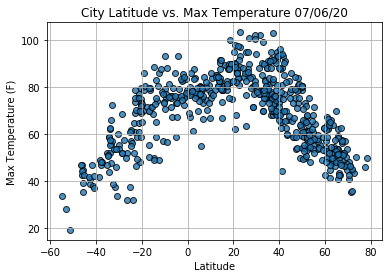

In [21]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

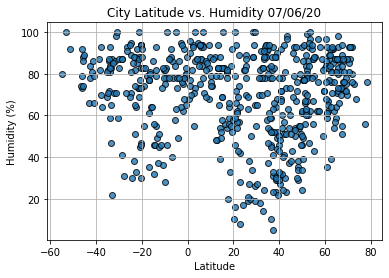

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

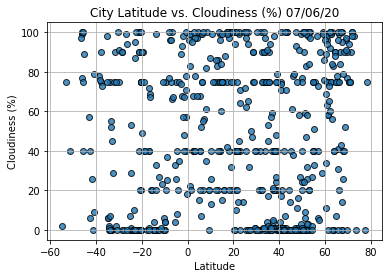

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

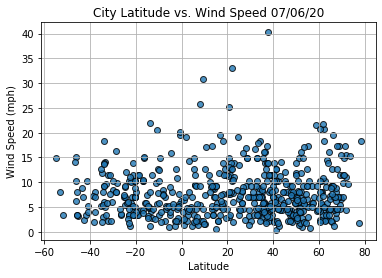

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()